Test the function CFE


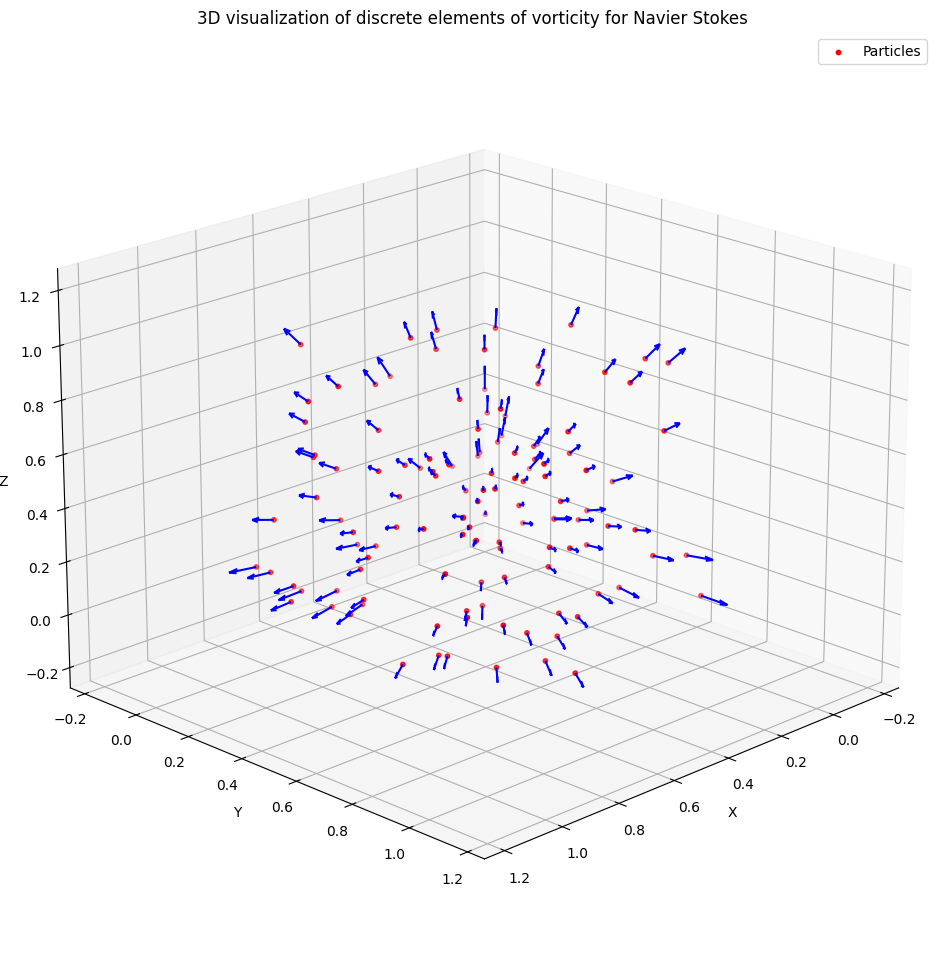

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
from mpl_toolkits.mplot3d import Axes3D
from jax import random
from time_stepper import *
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax.random as random
from mpl_toolkits.mplot3d import Axes3D


def plot_vectors(pos, vec, sample_rate=2, zoom_out_factor=1.2):
    """
    Plots particles at pos[i, j, k, :] with vectors vec[i, j, k, :].
    
    Args:
        pos: JAX array (N, N, N, 3) - particle positions
        vec: JAX array (N, N, N, 3) - attached vectors
        sample_rate: int - how many points to skip to avoid cluttering
        zoom_out_factor: float - expands the plot range (default 1.2 means 20% wider)
    """
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Extract downsampled positions and vectors
    X = pos[::sample_rate, ::sample_rate, ::sample_rate, 0].flatten()
    Y = pos[::sample_rate, ::sample_rate, ::sample_rate, 1].flatten()
    Z = pos[::sample_rate, ::sample_rate, ::sample_rate, 2].flatten()

    U = vec[::sample_rate, ::sample_rate, ::sample_rate, 0].flatten()
    V = vec[::sample_rate, ::sample_rate, ::sample_rate, 1].flatten()
    W = vec[::sample_rate, ::sample_rate, ::sample_rate, 2].flatten()

    # Compute automatic axis limits
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    z_min, z_max = Z.min(), Z.max()

    # Apply zoom-out factor
    x_range = (x_max - x_min) * zoom_out_factor
    y_range = (y_max - y_min) * zoom_out_factor
    z_range = (z_max - z_min) * zoom_out_factor

    x_center = (x_max + x_min) / 2
    y_center = (y_max + y_min) / 2
    z_center = (z_max + z_min) / 2

    ax.set_xlim([x_center - x_range / 2, x_center + x_range / 2])
    ax.set_ylim([y_center - y_range / 2, y_center + y_range / 2])
    ax.set_zlim([z_center - z_range / 2, z_center + z_range / 2])

    # Plot vectors
    ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True, color='blue')

    # Plot particles
    ax.scatter(X, Y, Z, color='red', s=10, label="Particles")

    # Adjust camera view
    ax.view_init(elev=20, azim=45)
    ax.dist = 12  # Can be adjusted further if needed

    # Labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("3D visualization of discrete elements of vorticity for Navier Stokes")
    ax.legend()
    plt.show()

NM = 10
delta = 0.1
dt = 0.1
key = random.PRNGKey(0)
pos = random.uniform(key, shape=(NM, NM, NM, 3))
vec = random.uniform(key, shape=(NM, NM, NM, 3))
carr = random.uniform(key, shape=(NM, NM, NM))
vec_matrix = random.uniform(key, shape=(NM, NM, NM, 3, 3))
print('Test the function CFE')
initial_positions = pos

plot_vectors(pos, vec, sample_rate=2, zoom_out_factor=1.5)

carry, all = integrate(step, pos, vec_matrix, initial_positions, dt, delta, NM)
pos, vec_matrix, initial_positions = unstacked(carry)
vec = jnp.einsum('...ij,...j->...i', vec_matrix, initial_positions)

# Call the plotting function
#plot_vectors(pos, vec, sample_rate=2, zoom_out_factor=1.5)